<a href="https://colab.research.google.com/github/widyasitopu/games-sales/blob/main/Games_Sales_2_0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Collection

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

In [2]:
sheet_url = 'https://docs.google.com/spreadsheets/d/1pvgIf5G6_M-ReNSHqMcnoMfQxcZrDzzjTqMomfTIQvE/edit#gid=2094679213'
sheet_url_trf = sheet_url.replace('/edit#gid=', '/export?format=csv&gid=')
print(sheet_url_trf)

https://docs.google.com/spreadsheets/d/1pvgIf5G6_M-ReNSHqMcnoMfQxcZrDzzjTqMomfTIQvE/export?format=csv&gid=2094679213


In [3]:
df = pd.read_csv(sheet_url_trf)
df.head()

,Name,Sales,Series,Release,Genre,Developer,Publisher
0,PlayerUnknown's Battlegrounds,42.0,NaN,12/1/2017,Battle royale,PUBG Studios,Krafton
1,Minecraft,33.0,Minecraft,11/1/2011,"Sandbox, survival",Mojang Studios,Mojang Studios
2,Diablo III,20.0,Diablo,5/1/2012,Action role-playing,Blizzard Entertainment,Blizzard Entertainment
3,Garry's Mod,20.0,NaN,11/1/2006,Sandbox,Facepunch Studios,Valve
4,Terraria,17.2,NaN,5/1/2011,Action-adventure,Re-Logic,Re-Logic


# Data Preparation

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 177 entries, 0 to 176
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Name       177 non-null    object 
 1   Sales      177 non-null    float64
 2   Series     141 non-null    object 
 3   Release    177 non-null    object 
 4   Genre      177 non-null    object 
 5   Developer  177 non-null    object 
 6   Publisher  177 non-null    object 
dtypes: float64(1), object(6)
memory usage: 9.8+ KB


In [5]:
df.columns

Index(['Name', 'Sales', 'Series', 'Release', 'Genre', 'Developer',
       'Publisher'],
      dtype='object')

In [6]:
df_cleaned = df.copy()

df_cleaned['Release'] = pd.to_datetime(df_cleaned['Release'])

print(df_cleaned.info())
df_cleaned.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 177 entries, 0 to 176
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Name       177 non-null    object        
 1   Sales      177 non-null    float64       
 2   Series     141 non-null    object        
 3   Release    177 non-null    datetime64[ns]
 4   Genre      177 non-null    object        
 5   Developer  177 non-null    object        
 6   Publisher  177 non-null    object        
dtypes: datetime64[ns](1), float64(1), object(5)
memory usage: 9.8+ KB
None


,Name,Sales,Series,Release,Genre,Developer,Publisher
0,PlayerUnknown's Battlegrounds,42.0,NaN,2017-12-01,Battle royale,PUBG Studios,Krafton
1,Minecraft,33.0,Minecraft,2011-11-01,"Sandbox, survival",Mojang Studios,Mojang Studios
2,Diablo III,20.0,Diablo,2012-05-01,Action role-playing,Blizzard Entertainment,Blizzard Entertainment
3,Garry's Mod,20.0,NaN,2006-11-01,Sandbox,Facepunch Studios,Valve
4,Terraria,17.2,NaN,2011-05-01,Action-adventure,Re-Logic,Re-Logic


In [7]:
df_cleaned['Publisher'].value_counts()

Electronic Arts           19
Blizzard Entertainment    10
Paradox Interactive        7
Activision                 6
GT Interactive             5
                          ..
Landfall Games             1
Headup Games               1
Atari, Inc                 1
Konami                     1
Blue Fang Games            1
Name: Publisher, Length: 96, dtype: int64

In [8]:
for col_name in ['Series', 'Genre', 'Developer', 'Publisher']:
  print(df_cleaned[col_name].value_counts(), '\n')

StarCraft                6
Command & Conquer        5
Civilization             4
Age of Empires           4
Warcraft                 3
                        ..
Alice                    1
Ark: Survival Evolved    1
BioShock                 1
Commandos                1
Zoo Tycoon               1
Name: Series, Length: 91, dtype: int64 

Real-time strategy                        26
First-person shooter                      19
Action role-playing                       12
Construction and management simulation     9
Role-playing game                          8
                                          ..
Action role-playing game                   1
Maze, arcade                               1
Action-adventure, platformer               1
Action-adventure, Survival                 1
Space combat simulation                    1
Name: Genre, Length: 61, dtype: int64 

Blizzard Entertainment             10
Maxis                               6
Paradox Development Studio          5
id Software  

In [9]:
df_cleaned['Name'].duplicated().sum()

2

In [10]:
df_cleaned[df_cleaned.duplicated()]

,Name,Sales,Series,Release,Genre,Developer,Publisher
175,StarCraft II: Heart of the Swarm,1.0,StarCraft,2013-03-01,Real-time strategy,Blizzard Entertainment,Blizzard Entertainment
176,StarCraft II: Legacy of the Void,1.0,StarCraft,2015-11-01,Real-time strategy,Blizzard Entertainment,Blizzard Entertainment


In [11]:
df_cleaned = df_cleaned.drop_duplicates()
df_cleaned.duplicated().sum()

0

In [12]:
df_cleaned.info()
df_cleaned.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 175 entries, 0 to 174
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Name       175 non-null    object        
 1   Sales      175 non-null    float64       
 2   Series     139 non-null    object        
 3   Release    175 non-null    datetime64[ns]
 4   Genre      175 non-null    object        
 5   Developer  175 non-null    object        
 6   Publisher  175 non-null    object        
dtypes: datetime64[ns](1), float64(1), object(5)
memory usage: 10.9+ KB


,Name,Sales,Series,Release,Genre,Developer,Publisher
0,PlayerUnknown's Battlegrounds,42.0,NaN,2017-12-01,Battle royale,PUBG Studios,Krafton
1,Minecraft,33.0,Minecraft,2011-11-01,"Sandbox, survival",Mojang Studios,Mojang Studios
2,Diablo III,20.0,Diablo,2012-05-01,Action role-playing,Blizzard Entertainment,Blizzard Entertainment
3,Garry's Mod,20.0,NaN,2006-11-01,Sandbox,Facepunch Studios,Valve
4,Terraria,17.2,NaN,2011-05-01,Action-adventure,Re-Logic,Re-Logic


Dalam proses cleaning data ini dilakukan perubahan tipe data dan juga penghapusan data duplikat. Untuk data yang kosong di kolum series, setelah melakukan beberapa riset terkait, data dari game tersebut memang tidak memiliki series sehingga dibiarkan dalam bentuk NaN.

# Explanatory Data Analysis

## Data Analysis

In [13]:
# The oldest and the newest game
games_sorted = df_cleaned.sort_values(by=['Release'])

oldest_game = games_sorted.iloc[0]
newest_game = games_sorted.iloc[-1]

oldest_date = oldest_game['Release'].to_pydatetime().strftime('%d-%m-%Y')
newest_date = newest_game['Release'].to_pydatetime().strftime('%d-%m-%Y')

print("The oldest game in Game Sales dataset is : ", oldest_game['Name'], '(' + oldest_date + ')')
print("The newest game in Game Sales dataset is : ", newest_game['Name'], '(' + newest_date + ')')

The oldest game in Game Sales dataset is :  Hydlide (01-12-1984)
The newest game in Game Sales dataset is :  Valheim (01-02-2021)


In [14]:
oldest_game = df_cleaned[['Name', 'Release']].sort_values('Release').head()
newest_game = df_cleaned[['Name', 'Release']].sort_values('Release').tail()
# newest_game1 = df_cleaned[['Name', 'Release']].sort_values('Release', ascending = False).head() --> bisa juga pakai ini buat nampilinnya selain tail()
print(oldest_game)
print('')
print(newest_game)

                                       Name    Release
133                                 Hydlide 1984-12-01
34   Where in the World Is Carmen Sandiego? 1985-06-01
88                     International Karate 1985-11-01
162                                  Tetris 1988-01-01
22                             Last Ninja 2 1988-08-01

                   Name    Release
139             Mordhau 2019-04-01
10            Fall Guys 2020-08-01
110  Crusader Kings III 2020-09-01
27       Cyberpunk 2077 2020-12-01
20              Valheim 2021-02-01


In [15]:
# Publisher who published most of the games
games_by_publisher = df_cleaned.groupby('Publisher')
game_counts = games_by_publisher['Name'].count()

most_games = game_counts.idxmax()
print("Publisher who published most of the games is : ", most_games, "\nwith many published games : ", game_counts.loc[most_games])

Publisher who published most of the games is :  Electronic Arts 
with many published games :  19


In [16]:
games_by_publisher = df_cleaned.groupby('Publisher', as_index = False)['Name'].nunique()
games_by_publisher.sort_values('Name', ascending = False)

,Publisher,Name
28,Electronic Arts,19
8,Blizzard Entertainment,8
62,Paradox Interactive,7
2,Activision,6
37,GT Interactive,5
...,...,...
36,Frontier Developments,1
35,Facepunch Studios,1
34,FX Interactive,1
33,Epyx,1


In [17]:
# Developer who developed most of the games
games_by_developer = df_cleaned.groupby('Developer')
game_counts = games_by_developer['Name'].count()

most_games = game_counts.idxmax()
print("Developer who developed most of the games is : ", most_games, "\nwith many published games : ", game_counts.loc[most_games])

Developer who developed most of the games is :  Blizzard Entertainment 
with many published games :  8


In [18]:
games_by_developer = df_cleaned.groupby('Developer', as_index = False)['Name'].nunique()
games_by_developer.sort_values('Name', ascending = False)

,Developer,Name
6,Blizzard Entertainment,8
60,Maxis,6
70,Paradox Development Studio,5
108,id Software,4
106,Westwood Studios,4
...,...,...
48,Introversion Software,1
47,Infocom,1
44,Heuristic Park,1
42,Gray Matter Interactive,1


In [19]:
# Series is the most sales
sales_by_series = df_cleaned.groupby('Series')
sales_sum = sales_by_series['Sales'].sum()

most_sales = sales_sum.idxmax()
print("Series which the most sales is : ", most_sales, "\nwith sales : ", sales_sum.loc[most_sales], "(in millions)")

Series which the most sales is :  Minecraft 
with sales :  33.0 (in millions)


In [20]:
sales_by_series = df_cleaned.groupby('Series', as_index = False).agg({'Sales' : 'sum', 'Name' : 'nunique'})
sales_by_series.sort_values('Sales', ascending = False)

,Series,Sales,Name
47,Minecraft,33.0,1
22,Diablo,26.0,3
75,The Sims,24.0,3
36,Half-Life,21.0,2
85,Warcraft,19.0,3
...,...,...,...
60,RoboCop,1.0,1
46,Microsoft Flight Simulator,1.0,1
58,Railroad Tycoon,1.0,1
56,Psychonauts,1.0,1


In [21]:
# Series have the most games
games_by_series = df_cleaned.groupby('Series')
game_count = games_by_series['Name'].count()

most_games = game_count.idxmax()
print("Series who have the most games is : ", most_games, "\n with many games : ", game_count.loc[most_games])

Series who have the most games is :  Command & Conquer 
 with many games :  5


In [22]:
games_by_series = df_cleaned.groupby('Series', as_index = False)['Name'].nunique()
games_by_series.sort_values('Name', ascending = False)

,Series,Name
13,Command & Conquer,5
68,StarCraft,4
2,Age of Empires,4
12,Civilization,4
20,Dark Souls,3
...,...,...
41,International Karate,1
40,Hydlide,1
38,Hearts of Iron,1
37,Harry Potter,1


In [23]:
# Publisher is the most sales
sales_by_publisher = df_cleaned.groupby('Publisher')
sales_sum = sales_by_publisher['Sales'].sum()

most_sales = sales_sum.idxmax()
print("Publisher which the most sales is : ", most_sales, "\nwith sales : ", sales_sum.loc[most_sales], "(in millions)")

Publisher which the most sales is :  Blizzard Entertainment 
with sales :  59.0 (in millions)


In [24]:
sales_by_publisher = df_cleaned.groupby('Publisher', as_index = False).agg({'Sales' : 'sum', 'Name' : 'nunique'})
sales_by_publisher.sort_values('Sales', ascending = False)

,Publisher,Sales,Name
8,Blizzard Entertainment,59.0,8
28,Electronic Arts,54.0,19
51,Krafton,42.0,1
59,Mojang Studios,33.0,1
89,Valve,20.0,1
...,...,...,...
41,Hasbro Interactive,1.0,1
47,Introversion Software,1.0,1
53,Larian Studios,1.0,1
71,Softstar,1.0,1


In [26]:
# Developer is the most sales
sales_by_developer = df_cleaned.groupby('Developer')
sales_sum = sales_by_developer['Sales'].sum()

most_sales = sales_sum.idxmax()
print("Developer which the most sales is : ", most_sales, "\nwith sales : ", sales_sum.loc[most_sales], "(in millions)")

Developer which the most sales is :  Blizzard Entertainment 
with sales :  58.0 (in millions)


In [27]:
sales_by_developer = df_cleaned.groupby('Developer', as_index = False).agg({'Sales' : 'sum', 'Name' : 'nunique'})
sales_by_developer.sort_values('Sales', ascending = False)

,Developer,Sales,Name
6,Blizzard Entertainment,58.0,8
69,PUBG Studios,42.0,1
65,Mojang Studios,33.0,1
60,Maxis,33.0,6
34,Facepunch Studios,29.0,2
...,...,...,...
80,SCE Cambridge Studio,1.0,1
40,Galactic Cafe,1.0,1
31,Enlight Software,1.0,1
84,Softstar,1.0,1


## Data Visualization

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


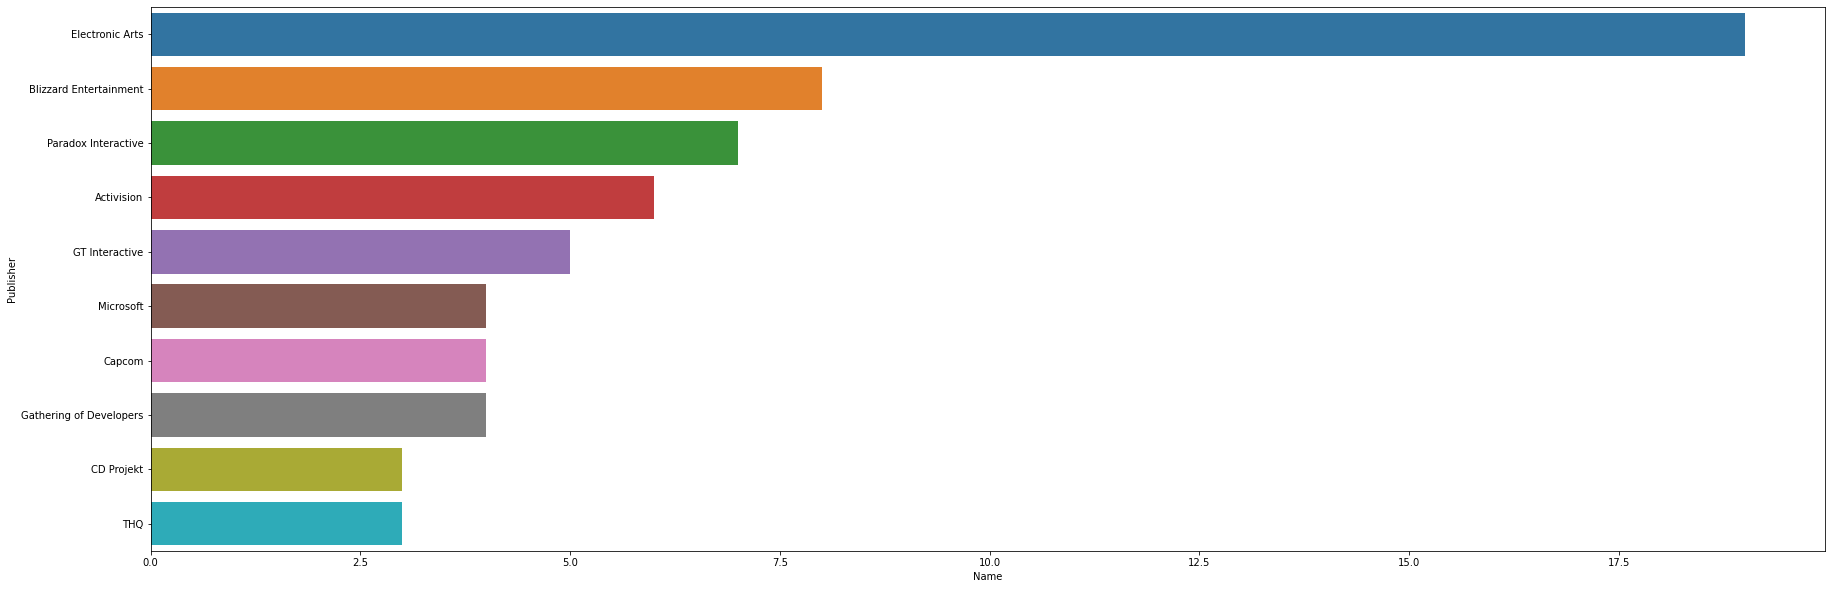

In [ ]:
# Visualization of publisher who published most of the games
plt.rcParams['figure.figsize'] = (30,10)
sns.barplot('Name', 'Publisher', data = games_by_publisher.sort_values('Name', ascending = False).head(10))

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


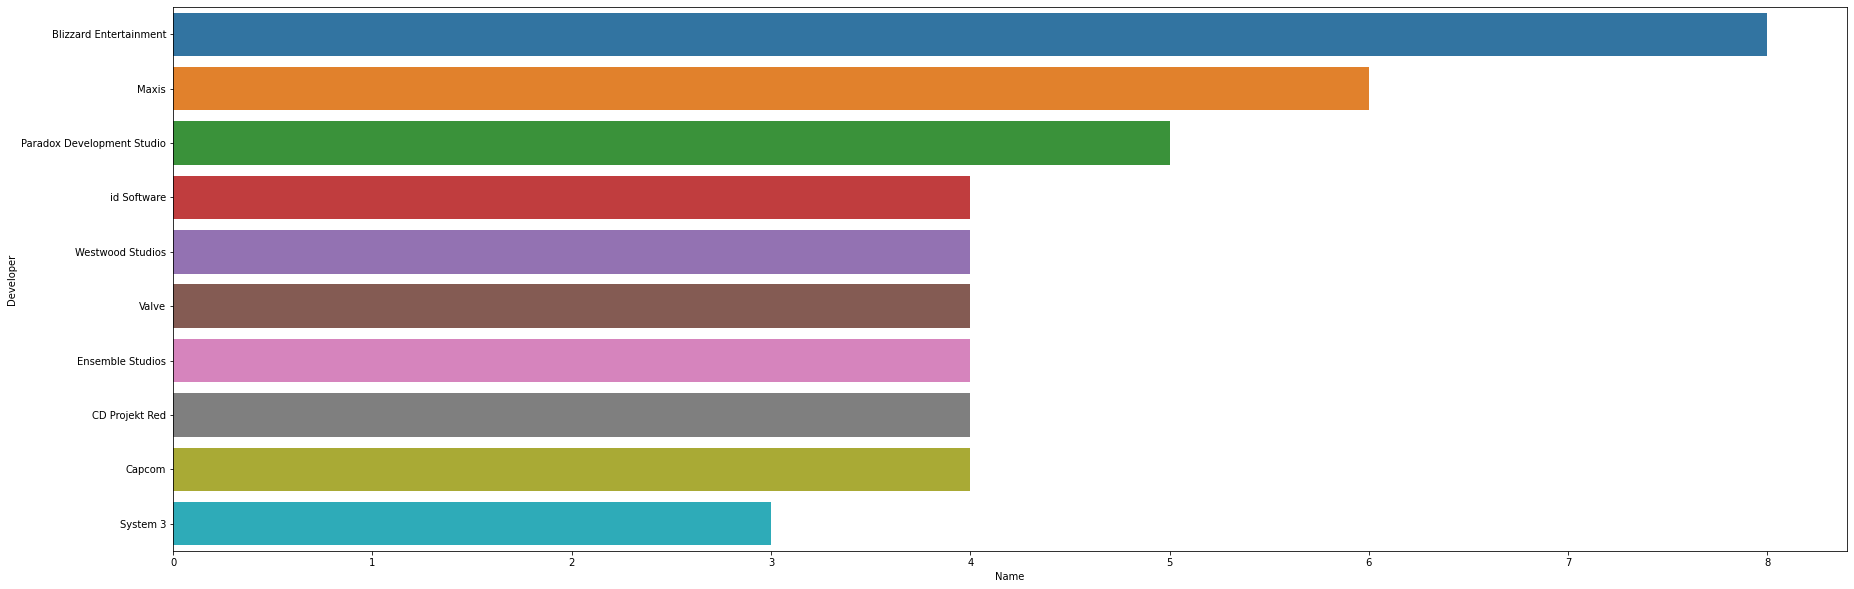

In [ ]:
# Visualization of developer who developed most of the games
plt.rcParams['figure.figsize'] = (30,10)
sns.barplot('Name', 'Developer', data = games_by_developer.sort_values('Name', ascending=False).head(10))

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


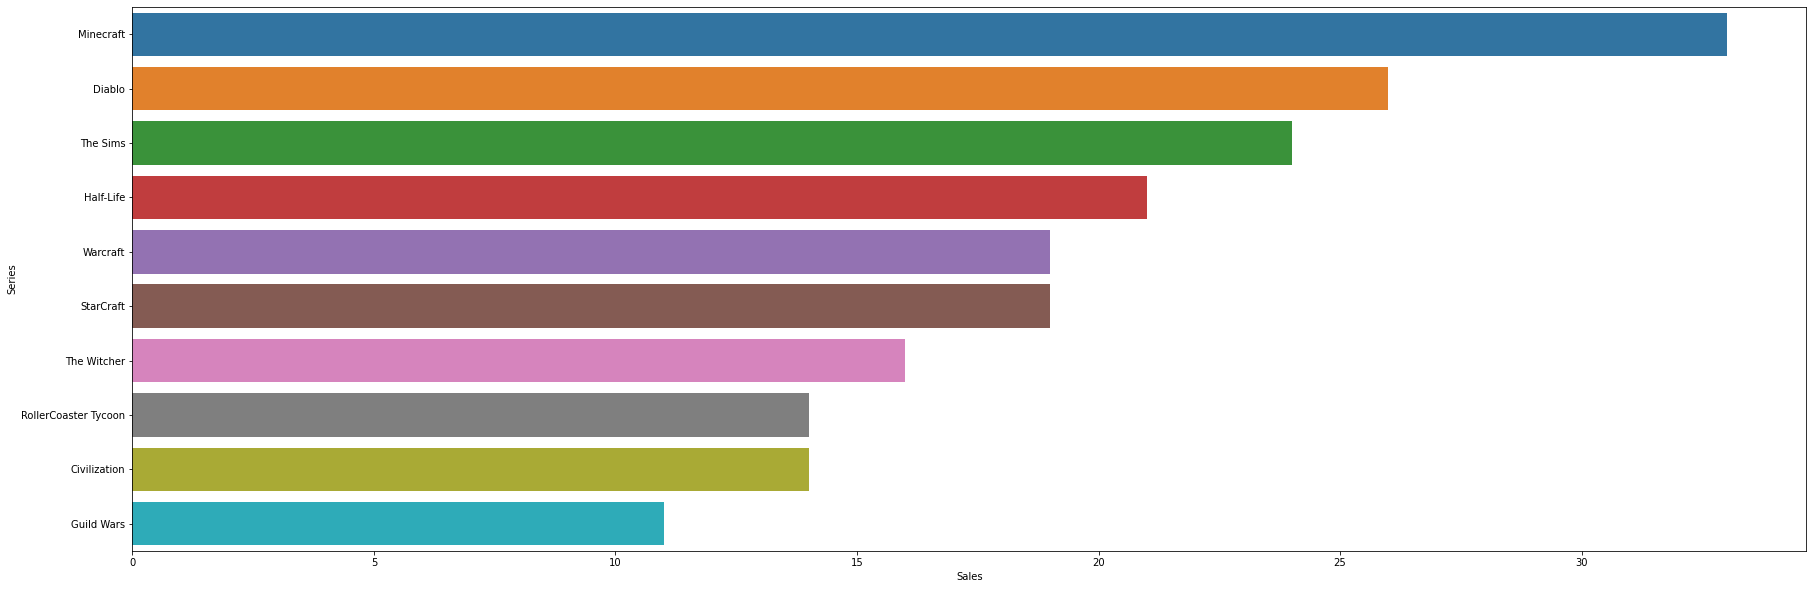

In [ ]:
# Visualization of series is the most sales
plt.rcParams['figure.figsize'] = (30,10)
sns.barplot('Sales', 'Series', data = sales_by_series.sort_values('Sales', ascending=False).head(10))

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


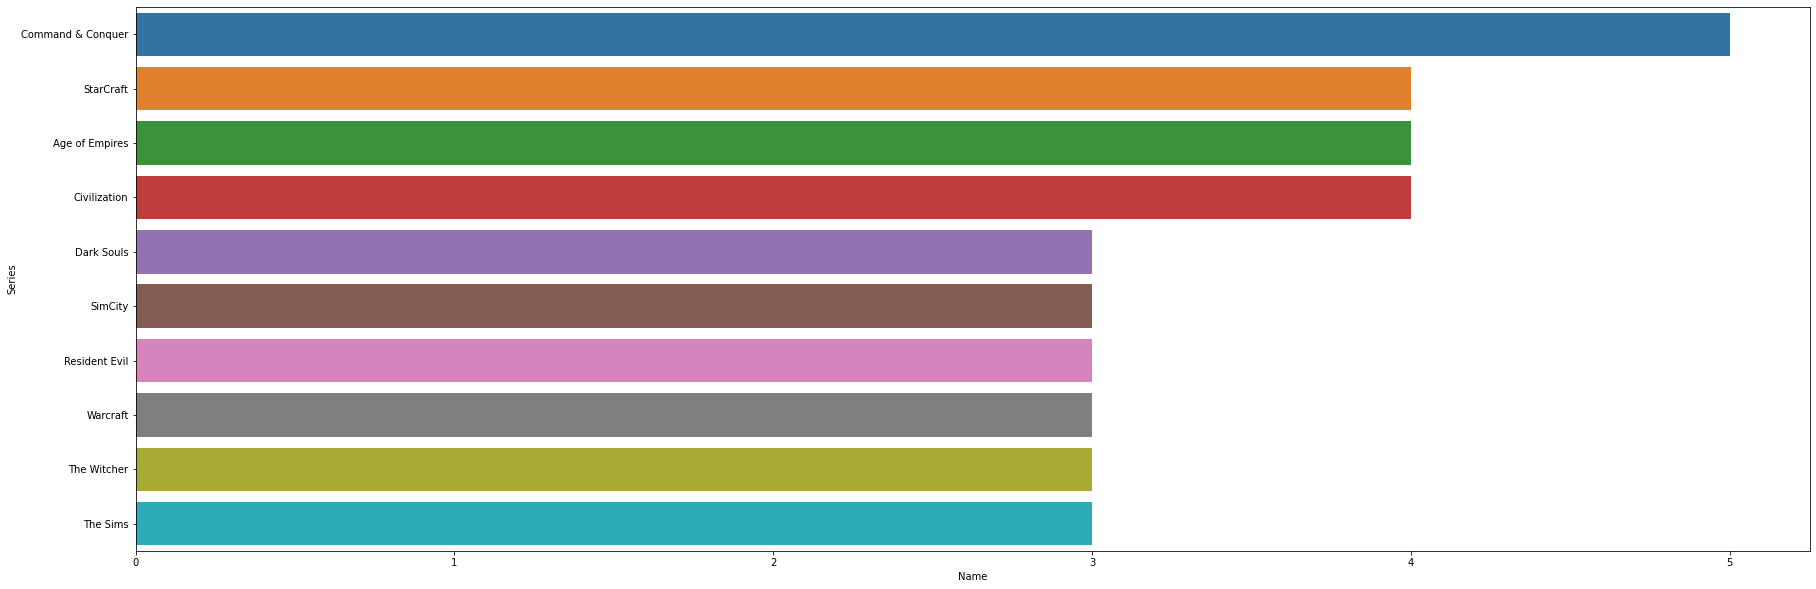

In [ ]:
# Visualization of series who have most of the games
plt.rcParams['figure.figsize'] = (30,10)
sns.barplot('Name', 'Series', data = games_by_series.sort_values('Name', ascending=False).head(10))

In [ ]:
sales_by_release = df_cleaned.groupby('Release', as_index = False).agg({'Sales' : 'sum', 'Name' : 'nunique'})
sales_by_release.head()
# df_cleaned.reset_index()

,Release,Sales,Name
0,1984-12-01,1.0,1
1,1985-06-01,4.0,1
2,1985-11-01,1.5,1
3,1988-01-01,1.0,1
4,1988-08-01,5.5,1


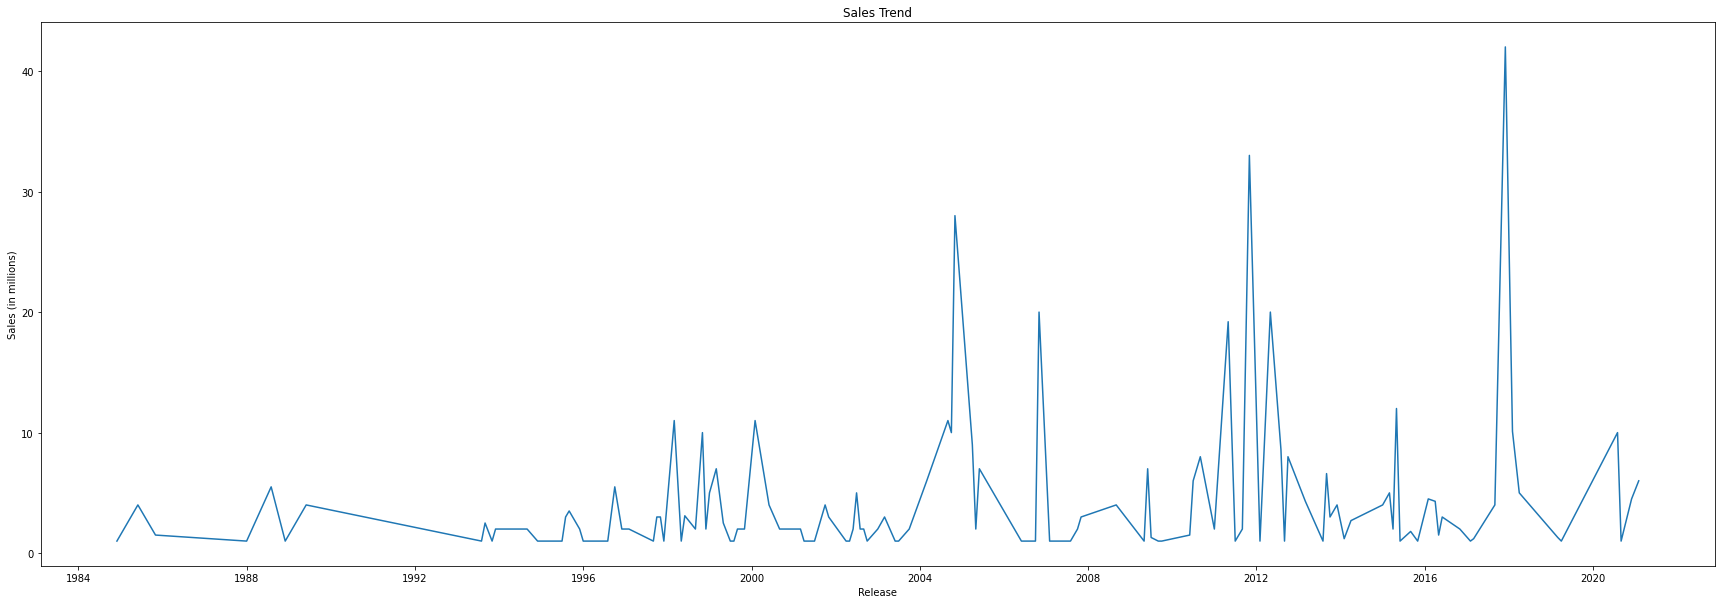

In [ ]:
# Visualization of sales per release time
df_cleaned = sales_by_release.sort_values('Release')
plt.rcParams['figure.figsize'] = (30,10)

plt.plot('Release', 'Sales', data=df_cleaned)
plt.title('Sales Trend')
plt.xlabel('Release')
plt.ylabel('Sales (in millions)')
plt.show()

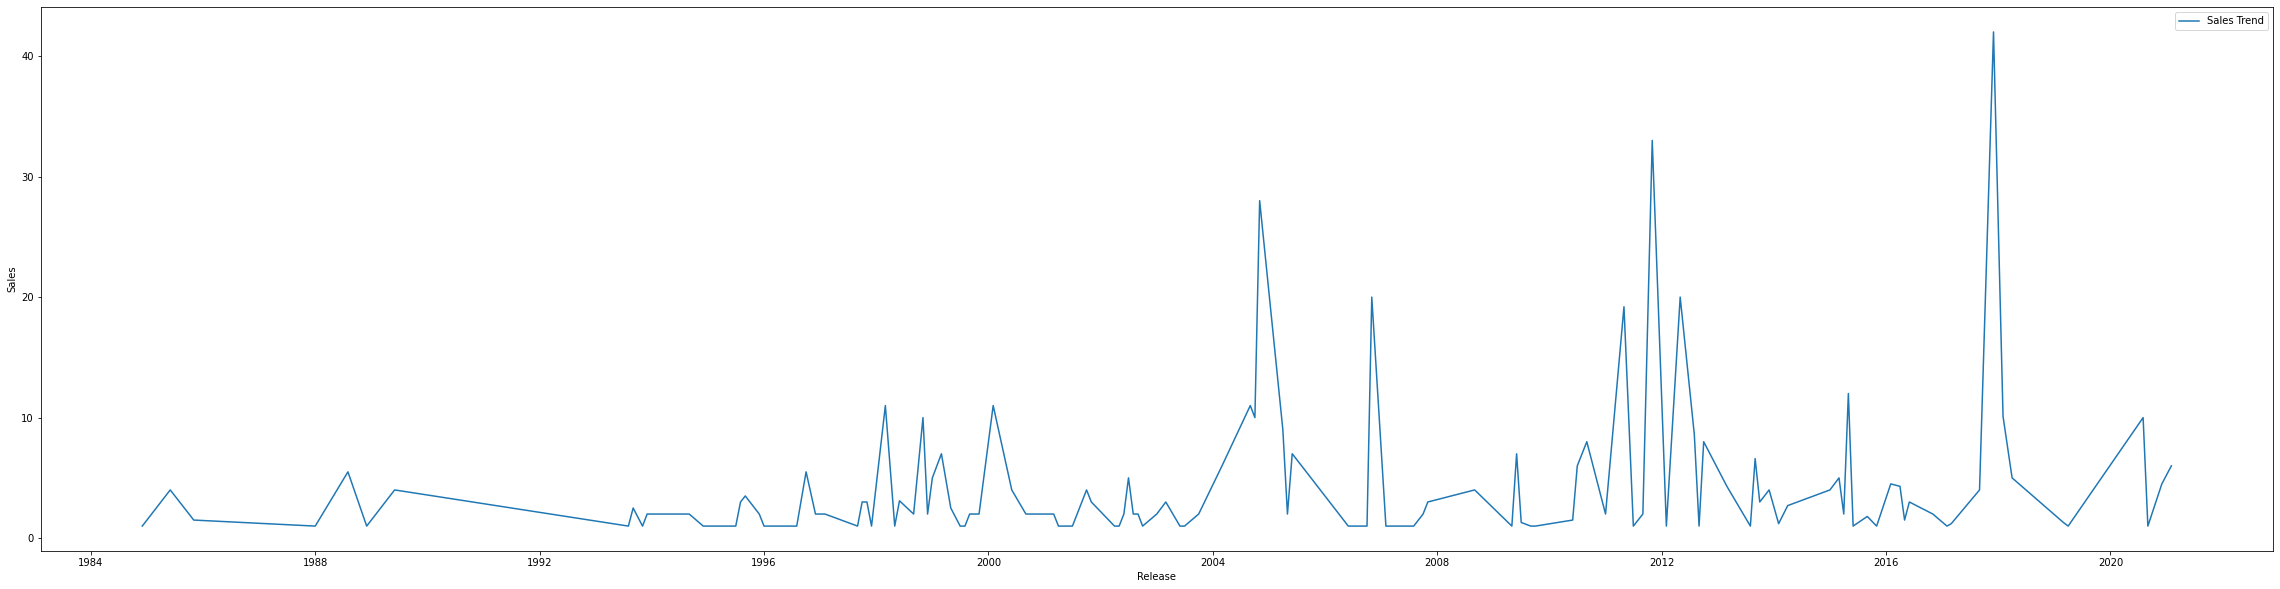

In [ ]:
# Visualization of sales per release time
sns.lineplot(data = sales_by_release, x = 'Release', y ='Sales', label = 'Sales Trend')

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


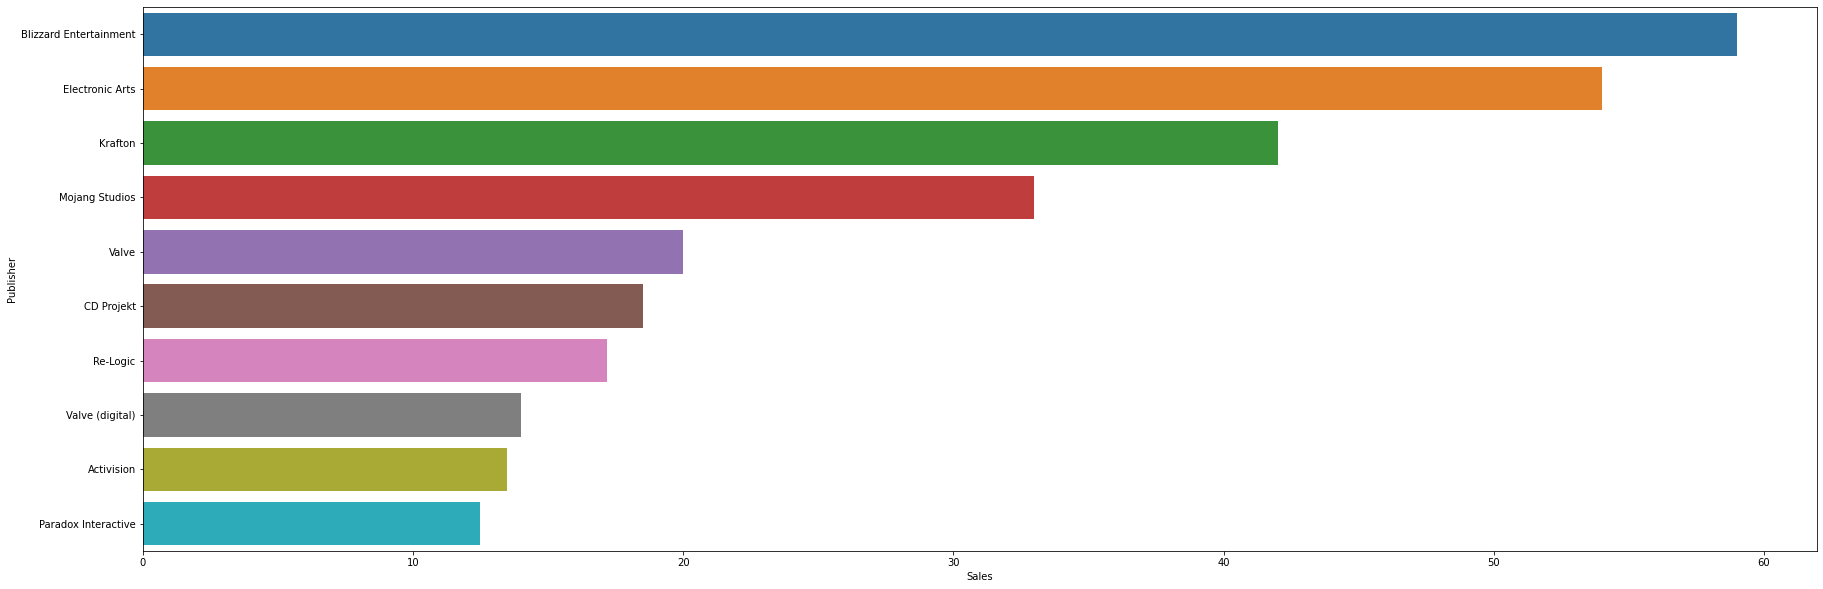

In [25]:
# Visualization of publisher is the most sales
plt.rcParams['figure.figsize'] = (30,10)
sns.barplot('Sales', 'Publisher', data = sales_by_publisher.sort_values('Sales', ascending=False).head(10))

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


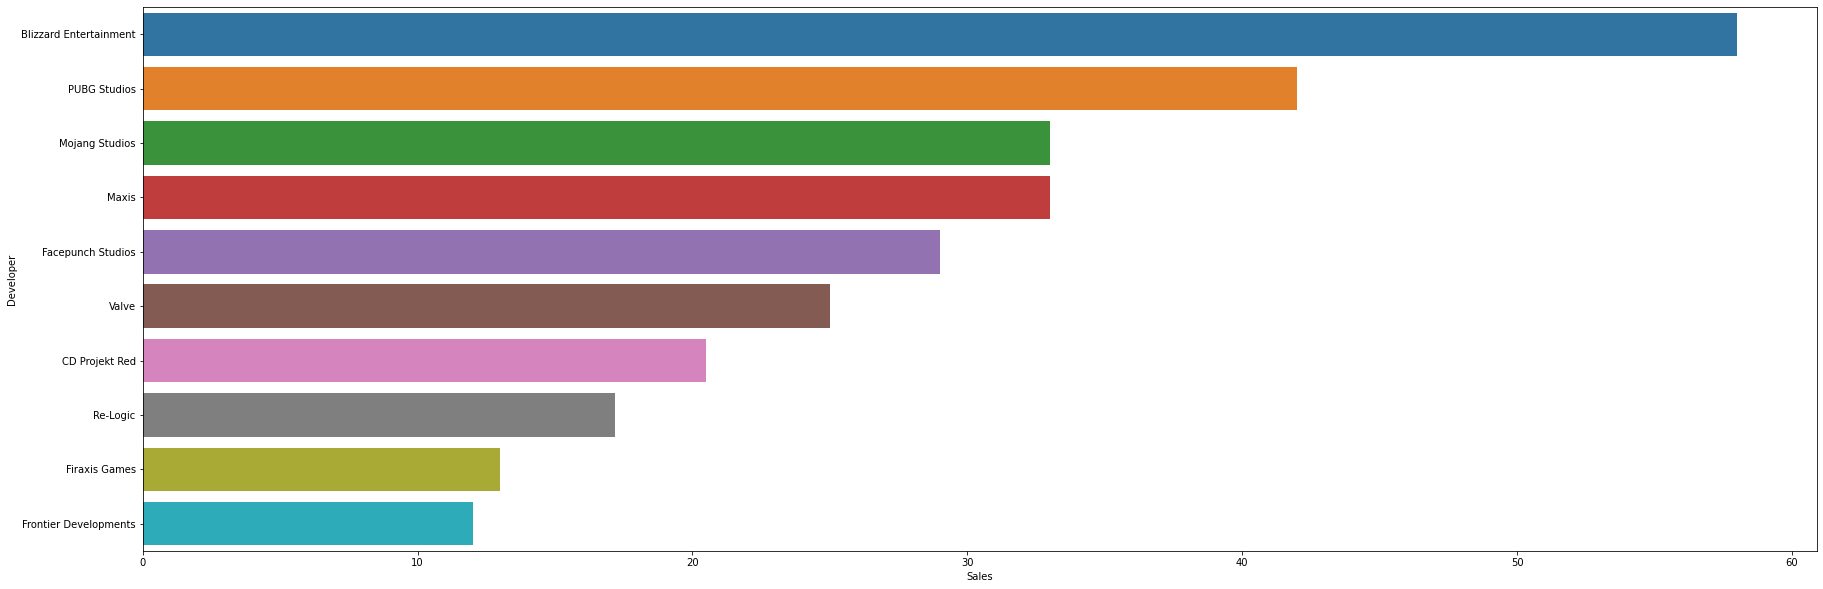

In [28]:
# Visualization of developer is the most sales
plt.rcParams['figure.figsize'] = (30,10)
sns.barplot('Sales', 'Developer', data = sales_by_developer.sort_values('Sales', ascending=False).head(10))